In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
swiss = pd.read_csv('../data/swiss.csv', ).drop('Unnamed: 0', axis=1)
swiss.rename(columns={'Infant.Mortality': 'Infant_Mortality'}, inplace=True)

In [3]:
all_predictors = swiss.columns.difference(['Fertility'])
formula = 'Fertility ~ ' + '+'.join(all_predictors)
formula

'Fertility ~ Agriculture+Catholic+Education+Examination+Infant_Mortality'

In [4]:
lm = smf.ols(formula, data=swiss).fit()
resid = lm.resid

In [5]:
leverage = lm.get_influence().summary_frame()['hat_diag']
standardized_resids = lm.get_influence().summary_frame()['standard_resid']

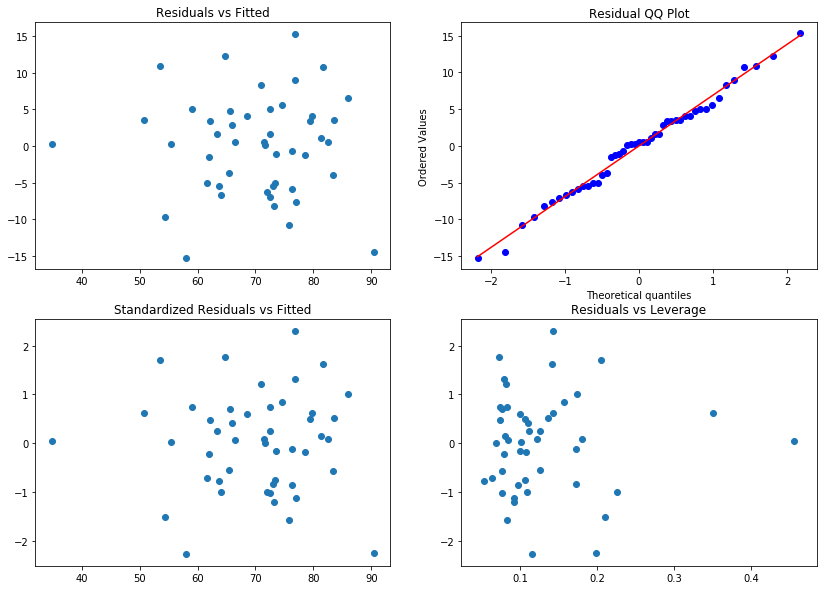

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes[0, 0].scatter(lm.fittedvalues, resid)
axes[0, 0].set_title('Residuals vs Fitted')
scipy.stats.probplot(resid, plot=axes[0, 1])
axes[0, 1].set_title('Residual QQ Plot')
axes[1, 0].scatter(lm.fittedvalues, standardized_resids)
axes[1, 0].set_title('Standardized Residuals vs Fitted')
axes[1, 1].scatter(leverage, standardized_resids)
axes[1, 1].set_title('Residuals vs Leverage')
plt.show()

### Simulated Example - 1

In [8]:
np.random.seed(1)
np.set_printoptions(suppress=True)

In [9]:
n = 100

x = np.concatenate(([10], np.random.normal(size=n)))
y = np.concatenate(([10], np.random.normal(size=n)))

In [10]:
lm = smf.ols('y ~ x', data={'y': y, 'x': x}).fit()
sample_xs = x.min(), x.max()
sample_ys = lm.predict({'x': sample_xs})

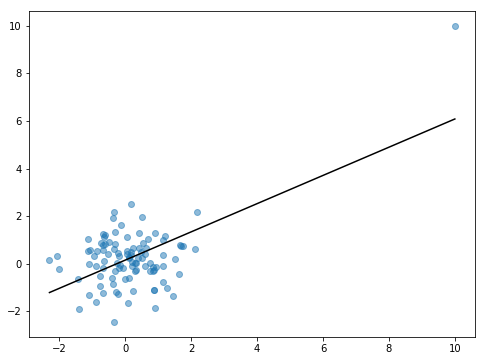

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, alpha=0.5)
ax.plot(sample_xs, sample_ys, c='black')
plt.show()

In [12]:
lm.get_influence().dfbetas[:10, 1].round(3)

array([ 7.037, -0.161, -0.076, -0.026, -0.092, -0.087, -0.242, -0.05 ,
        0.042, -0.007])

In [13]:
lm.get_influence().hat_matrix_diag[:10].round(3)

array([0.56 , 0.022, 0.013, 0.013, 0.019, 0.013, 0.044, 0.024, 0.015,
       0.01 ])

### Simulated Example - 2

In [14]:
n = 100

x = np.random.uniform(low=-2, high=2, size=n)
y = x + np.random.normal(scale=0.2, size=n)
x = np.concatenate(([10], x))
y = np.concatenate(([10], y))

In [15]:
lm2 = smf.ols('y ~ x', data={'y': y, 'x': x}).fit()
sample_xs = x.min(), x.max()
sample_ys = lm2.predict({'x': sample_xs})

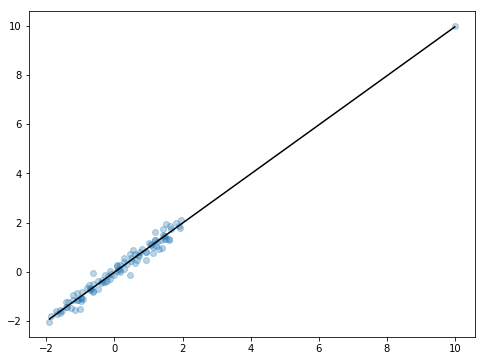

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, alpha=0.3)
ax.plot(sample_xs, sample_ys, c='black')
plt.show()

In [17]:
lm2.get_influence().dfbetas[:10, 1].round(3)

array([ 0.295,  0.01 , -0.014,  0.002, -0.005,  0.052, -0.004,  0.007,
        0.003,  0.01 ])

In [18]:
lm2.get_influence().hat_matrix_diag[:10].round(3)

array([0.464, 0.017, 0.014, 0.011, 0.011, 0.012, 0.011, 0.012, 0.014,
       0.01 ])